# 1.	Report the best hypermeters which used to run Random Forest algorithm. Explain your results.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [174]:
data = pd.read_csv('german_data_creditcard.csv')
data.head()

,Creditability,Acc_Bal_bin,Pay_Status_bin,Value_SavStock_bin,Length_Emp_bin,S&M_Status_bin,No_of_Credits_bin,Co_Credits_bin,Purpose_bin,Telephone_bin,Instalment_bin,Apartment_bin,Most_Val_Asset_bin,Duration_Credit,Credit_Amount,Age_bin
0,1,a. no account,c. no problem,"a. none, < 100 DM","a. Unemp, < 1 yr","a. M div, M single",a. 1,b. None,"a. used car, others",a. No,a. < 20,a. owner-occ / free,b. Savings / Car / Other,18,1049,a < 25 yr
1,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,b. None,"a. used car, others",a. No,c. [25-35),a. owner-occ / free,c. No assets,9,2799,b. >= 25 yr
2,1,b. no balance,b. paid up,"a. none, < 100 DM",c. above 4 years,"a. M div, M single",a. 1,b. None,"a. used car, others",a. No,c. [25-35),a. owner-occ / free,c. No assets,12,841,a < 25 yr
3,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,b. None,"a. used car, others",a. No,b. [20-25),a. owner-occ / free,c. No assets,12,2122,b. >= 25 yr
4,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,a. Other Banks or Dept Stores,"a. used car, others",a. No,a. < 20,b. rented flat,b. Savings / Car / Other,12,2171,b. >= 25 yr


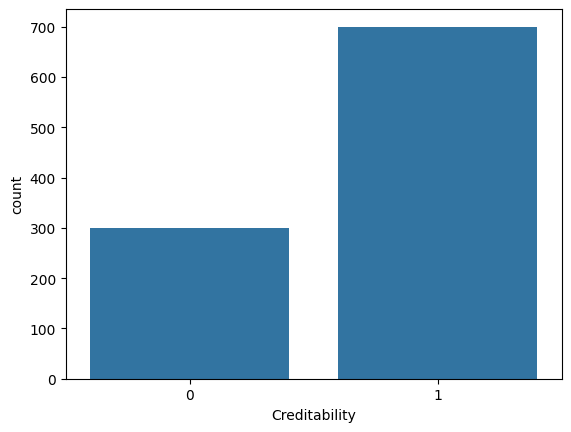

In [175]:
X = data.drop('Creditability', axis=1)
y = data['Creditability']

sns.countplot(x='Creditability', data=data) # there are more good credit scores than bad credit scores
plt.show()

In [176]:
X = pd.get_dummies(X) # encoding
X.head()

,Duration_Credit,Credit_Amount,Acc_Bal_bin_a. no account,Acc_Bal_bin_b. no balance,Acc_Bal_bin_c. some balance,Pay_Status_bin_a. some problem,Pay_Status_bin_b. paid up,Pay_Status_bin_c. no problem,"Value_SavStock_bin_a. none, < 100 DM",Value_SavStock_bin_b. >= 100 DM,"Length_Emp_bin_a. Unemp, < 1 yr",Length_Emp_bin_b. [1-4) years,Length_Emp_bin_c. above 4 years,"S&M_Status_bin_a. M div, M single","S&M_Status_bin_b. M mar, M wid, F",No_of_Credits_bin_a. 1,No_of_Credits_bin_b. > 1,Co_Credits_bin_a. Other Banks or Dept Stores,Co_Credits_bin_b. None,"Purpose_bin_a. used car, others","Purpose_bin_b. new car, home related",Telephone_bin_a. No,Telephone_bin_b. Yes,Instalment_bin_a. < 20,Instalment_bin_b. [20-25),Instalment_bin_c. [25-35),Instalment_bin_d. >= 35,Apartment_bin_a. owner-occ / free,Apartment_bin_b. rented flat,Most_Val_Asset_bin_a. Own house / land,Most_Val_Asset_bin_b. Savings / Car / Other,Most_Val_Asset_bin_c. No assets,Age_bin_a < 25 yr,Age_bin_b. >= 25 yr
0,18,1049,True,False,False,False,False,True,True,False,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,False,False,True,False,False,True,False,True,False
1,9,2799,True,False,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,False,True
2,12,841,False,True,False,False,True,False,True,False,False,False,True,True,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,True,False
3,12,2122,True,False,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True
4,12,2171,True,False,False,False,False,True,True,False,False,True,False,False,True,False,True,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False,True


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify yes because 1 and 0 are uneven

In [185]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_depth=10,
    min_samples_leaf=5,
    oob_score=True
)

model.fit(X_train, y_train)
model.oob_score_

0.7375

In [186]:
y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred)) # oob score became slightly lower after hyperparameter tuning, but accuracy became higher
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.765
Confusion Matrix: 
 [[ 28  32]
 [ 15 125]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.47      0.54        60
           1       0.80      0.89      0.84       140

    accuracy                           0.77       200
   macro avg       0.72      0.68      0.69       200
weighted avg       0.75      0.77      0.75       200



In [187]:
rf = RandomForestClassifier(random_state=42, n_jobs=1)

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=4,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best CV accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
Best CV accuracy:  0.75125
Test Accuracy: 0.765


Best Hyperparameters: 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200

Max depth basically means that each tree can grow to max depth of 10,
Min samples leaf means each leaf must have at least 5 samples, so the model does not create simple leaves on small ammount of data,
N estimators is how many trees are in the random forest, then model is stable.

# 2.	Run Aaboost and GB on the given data and compare. Explain your results.

### AAboost

In [188]:
aab = AdaBoostClassifier(random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    aab, 
    X, 
    y,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    error_score='raise'
)

aab.fit(X_train, y_train)

y_pred = aab.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8
Confusion Matrix:
 [[ 36  24]
 [ 16 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        60
           1       0.84      0.89      0.86       140

    accuracy                           0.80       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.79      0.80      0.80       200



Accuracy on test set is better with AdaBoost than random forest

### GB

In [189]:
gb_clf = GradientBoostingClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_scores = cross_val_score(
    gb_clf, 
    X, 
    y,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    error_score='raise'
)

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77
Confusion Matrix:
 [[ 32  28]
 [ 18 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.53      0.58        60
           1       0.81      0.87      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



Accuracy on GB is worse than random forest

#### Overall AdaBoost is best for credit card dataset showing highest scores over all metrics